In [87]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd

/tmp/ipykernel_81968/2621102551.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv('global-temperatures.csv', delim_whitespace=True)


   1880    13.5725
0  1881  13.599167
1  1882  13.685000
2  1883  13.671667
3  1884  13.395000
4  1885  13.535000


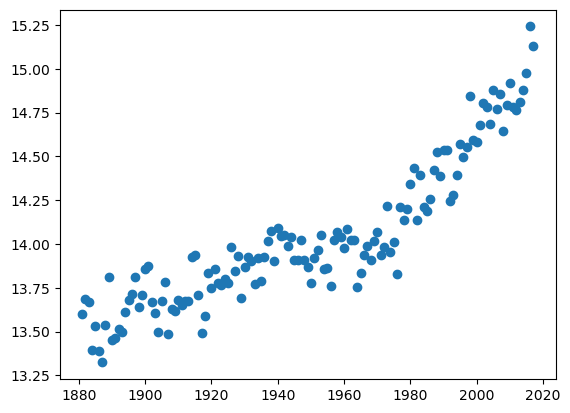

In [88]:
# 2a
df = pd.read_csv('global-temperatures.csv', delim_whitespace=True)
print(df.head())
x = df.iloc[:, 0]
y = df.iloc[:, 1]
plt.scatter(x, y)
plt.show()



In [89]:
# Perform the linear regression
# create sample matrix 
X = np.column_stack((np.ones(len(x)), x))
a = np.linalg.inv(X.T @ X) @ X.T @ y # we calcutated y in the previous step
print(a)

[-4.45147005  0.00948887]


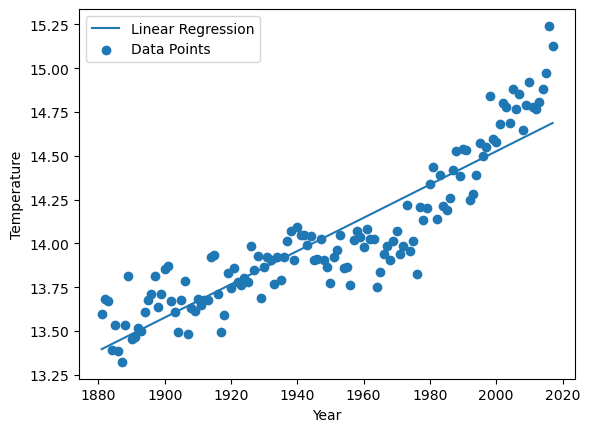

In [90]:
# plot the result 
beta_0 = a[0]
beta_1 = a[1]
y_pred = beta_0 + beta_1 * x
plt.plot(x, y_pred, label='Linear Regression')
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], label='Data Points')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.legend()
plt.show()

### Problem 2b

The $R^2$ value, calulated by $1 - \frac{E}{E_m}$ with $E$ being the error funtion and $E_m$ being the Sum of the true values and the mean values basically tells you how much % of the variance is being explained by the model. An R-squared score of 0 means that the regression is only as good as an average prediciton and a score of 1 means that your model is perfect

In [91]:
# caluclate R^2 

y_mean = np.mean(y)
E_m = np.sum((y - y_mean)**2)
E = np.sum((y - y_pred)**2)
R_2 = 1 - E/E_m
print(R_2)

0.8142296549922692


### Problem 2c

Assuming the regression has the form $y_i = \beta_0 + \beta_1 * x_i + \epsilon_i$ the interpretation of $\beta_1$ is the following: for full year that goes by the average annual temperature increases by $\beta_1$ 

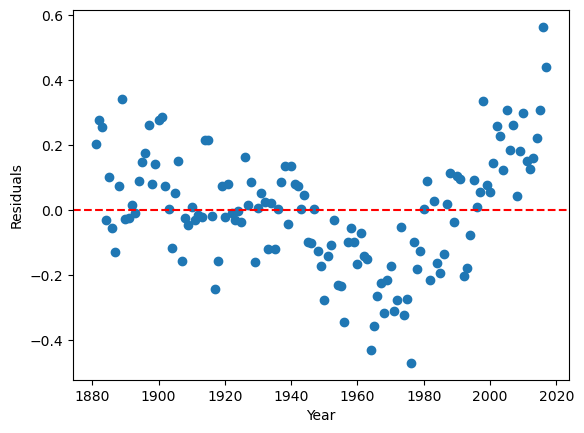

In [92]:
# 2d 

residuals = y - y_pred
plt.scatter(x, residuals)
plt.xlabel('Year')
plt.ylabel('Residuals')
plt.axhline(y=0.0, color='r', linestyle='--')
plt.show()

As one can clearly see, the residuals are not evenly distributed, which indicates a bad model choice. 

## Problem 3

In [93]:
cars = pd.read_csv('auto-mpg.csv', delim_whitespace=True)
cars.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year']
cars.head()

/tmp/ipykernel_81968/1951420674.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  cars = pd.read_csv('auto-mpg.csv', delim_whitespace=True)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
0,15.0,8.0,350.0,165.0,3693.0,11.5,70.0
1,18.0,8.0,318.0,150.0,3436.0,11.0,70.0
2,16.0,8.0,304.0,150.0,3433.0,12.0,70.0
3,17.0,8.0,302.0,140.0,3449.0,10.5,70.0
4,15.0,8.0,429.0,198.0,4341.0,10.0,70.0


In [94]:
# 3a
def calculate_params(x, y):
    X = np.column_stack((np.ones(len(x)), x))
    a = np.linalg.inv(X.T @ X) @ X.T @ y
    return a

input_data = np.matrix(cars.iloc[:, 1:].values)
y = np.array(cars.iloc[:, 0].values)
a = calculate_params(input_data, cars.iloc[:, 0].values)
X = np.column_stack((np.ones(len(input_data)), input_data))
print(np.shape(a))
print(np.shape(X))
print(np.shape(y))
y_pred = X@a.T
print(np.shape(y_pred))
np.set_printoptions(suppress=True)
print(a)


(1, 7)
(391, 7)
(391,)
(391, 1)
[[-14.87027196  -0.35140184   0.00774697   0.0003611   -0.00678733
    0.09040419   0.75668255]]


### Problem 3b

The magnitudes of the paramteres are so different due to the scaling of the sample space. A car will most likely not have more than 10 cylinders and not less than 2. But weight has way more values. So we have different scales. we could scale down or scale up. For example instead of using lbs as a weight measurement we could use metric tons. 

In [102]:
# Problem 3c
y = np.asarray(y)
y_pred = np.asarray(y_pred)
E = np.sum((y - y_pred.T) ** 2)
y_mean = np.mean(y)
E_m = np.sum((y - y_mean) ** 2)
R_2 = 1 - (E / E_m)
R_2

0.8093830761729737